# Laptop price prediction

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcatppuccin
import matplotlib as mpl

mpl.style.use('mocha')
pd.options.display.max_columns = 500

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [4]:
train['Weight'].value_counts()

Weight
2.2kg     86
2.1kg     44
2.3kg     32
2.4kg     32
2kg       25
          ..
0.99kg     1
1.76kg     1
2.99kg     1
3.6kg      1
2.38kg     1
Name: count, Length: 164, dtype: int64

In [5]:
train['ResolutionWidth'] = train['ScreenResolution'].str.extract(pat=r'(\d+)').astype('float32')
train['ResolutionHeight'] = train['ScreenResolution'].str.extract(pat=r'\w\d+\w(\d+)').astype('float32')
train['CPU_Manuf'] = train['Cpu'].str.extract(pat=r'(\w+)\s').astype('category')
train['CPU_Model'] = train['Cpu'].str.extract(pat=r'\s(\w+)').astype('category')
train['GHz'] = train['Cpu'].str.extract(pat=r'(\d+\.\d+)').astype('float32')
train['RAM_GB'] = train['Ram'].str.extract(pat=r'(\d+)').astype('float32')
train['HDD_1'] = train['Memory'].str.extract(r'(\d+)').astype('float32')
train['HDD_2'] = train['Memory'].str.extract(r'\s(\d+)').fillna(0).astype('float32')
train['HDD_1'] = train['HDD_1'].apply(lambda x: np.where(x<=2, x*1000, x))
train['HDD_2'] = train['HDD_2'].apply(lambda x: np.where(x<=2, x*1000, x))
train['HDD'] = train['HDD_1'] + train['HDD_2']
train['Weight_kg'] = train['Weight'].str.replace('kg', '').astype('float32')
train['GPU_Manuf'] = train['Gpu'].str.extract(pat=r'(\w+)').astype('category')
train['GPU_Model'] = train['Gpu'].str.extract(pat=r'\w+\s(\w+\s\w+)').astype('category')
train['GPU_Memory'] = train['Gpu'].str.extract(pat=r'(\d+)').astype('float32')

In [6]:
test['ResolutionWidth'] = test['ScreenResolution'].str.extract(pat=r'(\d+)').astype('float32')
test['ResolutionHeight'] = test['ScreenResolution'].str.extract(pat=r'\w\d+\w(\d+)').astype('float32')
test['CPU_Manuf'] = test['Cpu'].str.extract(pat=r'(\w+)\s').astype('category')
test['CPU_Model'] = test['Cpu'].str.extract(pat=r'\s(\w+)').astype('category')
test['GHz'] = test['Cpu'].str.extract(pat=r'(\d+\.\d+)').astype('float32')
test['RAM_GB'] = test['Ram'].str.extract(pat=r'(\d+)').astype('float32')
test['HDD_1'] = test['Memory'].str.extract(r'(\d+)').astype('float32')
test['HDD_2'] = test['Memory'].str.extract(r'\s(\d+)').fillna(0).astype('float32')
test['HDD_1'] = test['HDD_1'].apply(lambda x: np.where(x<=2, x*1000, x))
test['HDD_2'] = test['HDD_2'].apply(lambda x: np.where(x<=2, x*1000, x))
test['HDD'] = test['HDD_1'] + test['HDD_2']
test['Weight_kg'] = test['Weight'].str.replace('kg', '').astype('float32')
test['GPU_Manuf'] = test['Gpu'].str.extract(pat=r'(\w+)').astype('category')
test['GPU_Model'] = test['Gpu'].str.extract(pat=r'\w+\s(\w+\s\w+)').astype('category')
test['GPU_Memory'] = test['Gpu'].str.extract(pat=r'(\d+)').astype('float32')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                912 non-null    int64   
 1   laptop_ID         912 non-null    int64   
 2   Company           912 non-null    object  
 3   Product           912 non-null    object  
 4   TypeName          912 non-null    object  
 5   Inches            912 non-null    float64 
 6   ScreenResolution  912 non-null    object  
 7   Cpu               912 non-null    object  
 8   Ram               912 non-null    object  
 9   Memory            912 non-null    object  
 10  Gpu               912 non-null    object  
 11  OpSys             912 non-null    object  
 12  Weight            912 non-null    object  
 13  Price_euros       912 non-null    float64 
 14  ResolutionWidth   912 non-null    float32 
 15  ResolutionHeight  912 non-null    float32 
 16  CPU_Manuf         912 non-

In [8]:
to_drop = ['Product', 'ScreenResolution','Cpu', 'Ram', 'Memory', 'Gpu', 'Weight', 'HDD_1', 'HDD_2']

train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

In [9]:
train_model = train.copy()
test_model = test.copy()

train_model = train_model.drop(['id', 'laptop_ID'], axis=1)
test_model = test_model.drop(['id', 'laptop_ID'], axis=1)

In [10]:
train_model[['Company', 'TypeName', 'OpSys']] = train_model[['Company', 'TypeName', 'OpSys']].astype('category')
test_model[['Company', 'TypeName', 'OpSys']] = test_model[['Company', 'TypeName', 'OpSys']].astype('category')

In [11]:
train_category = train_model.select_dtypes(include='category')
train_category['price'] = train['Price_euros']

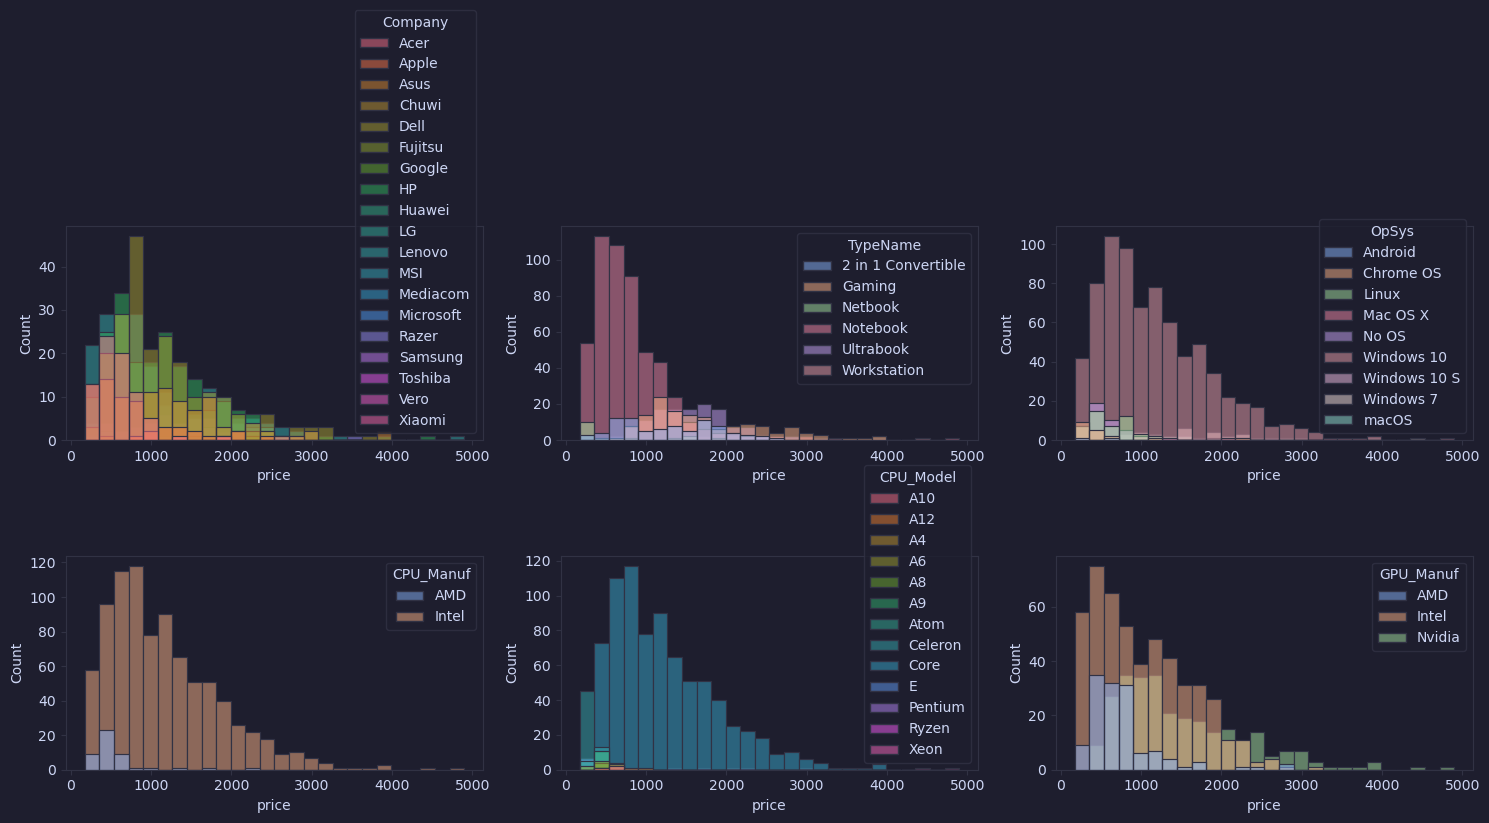

In [12]:
nrows = 2
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8), tight_layout=True)

a=0
for i in range(nrows):
    for j in range(ncols):
            sns.histplot(data=train_category, 
                          x='price', 
                          ax=axs[i,j],
                          hue=train_category.columns[a])
            #axs[i,j].tick_params(rotation=90)
            a+=1
            if a==7:
                break


In [13]:
train_numeric = train_model.select_dtypes(exclude='category')
train_numeric.head()

,Inches,Price_euros,ResolutionWidth,ResolutionHeight,GHz,RAM_GB,HDD,Weight_kg,GPU_Memory
0,12.5,669.0,1920.0,1080.0,0.9,4.0,64.0,1.20,515.0
1,17.3,1695.0,1920.0,1080.0,3.2,8.0,1256.0,3.20,580.0
2,15.6,779.0,1920.0,1080.0,2.7,4.0,1000.0,1.85,620.0
3,13.3,2240.0,3200.0,1800.0,2.5,16.0,512.0,1.29,640.0
4,15.6,825.0,1920.0,1080.0,2.5,4.0,1000.0,2.32,520.0


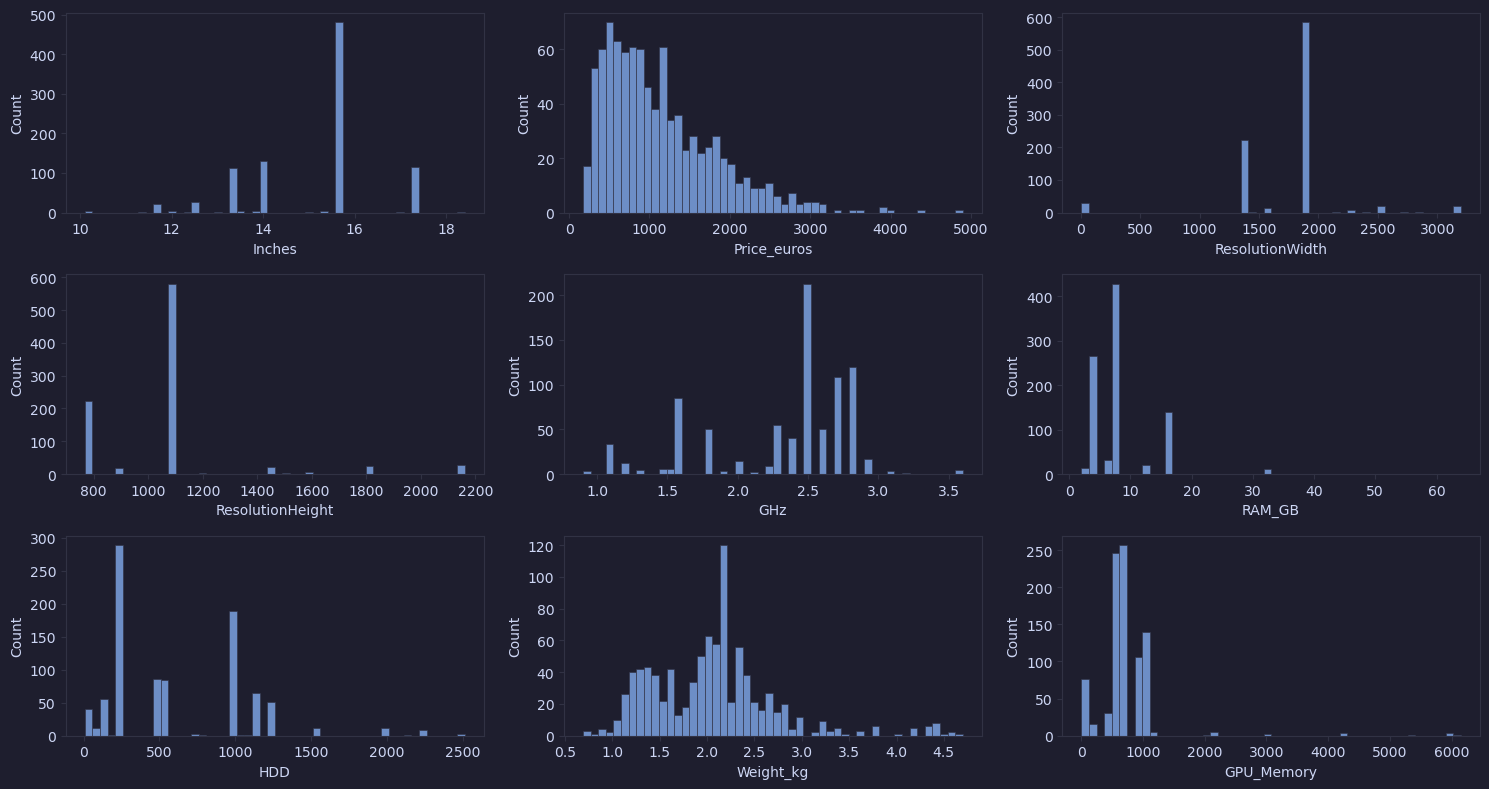

In [14]:
nrows = 3
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8), tight_layout=True)

a=0
for i in range(nrows):
    for j in range(ncols):
            sns.histplot(data=train_numeric, 
                          x=train_numeric.columns[a], 
                          ax=axs[i,j],
                          bins=50
                          )
            
            a+=1
            

In [15]:
train_category.drop('price', axis=1, inplace=True)
train_numeric.drop('Price_euros', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cat_columns = train_category.columns.tolist()
num_columns = train_numeric.columns.tolist()

imputer = SimpleImputer(strategy='most_frequent')
targ_transf = Pipeline(steps=[('log', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, check_inverse=True, feature_names_out='one-to-one')),('std', StandardScaler())])
log_transf = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, check_inverse=True, feature_names_out='one-to-one')
std_scaler = Pipeline(steps=[('imp', imputer),('log', log_transf),('std', StandardScaler())])
ohe = Pipeline(steps=[('imp', imputer), ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))] )

preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe, cat_columns),
    ('num', std_scaler, num_columns)
], remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Company', 'TypeName', 'OpSys', 'CPU_Manuf',
                                  'CPU_Model', 'GPU_Manuf', 'GPU_Model']),
                                ('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('log',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>,
                                                                      inverse_func=<ufunc 'expm1'>)),
                                                 ('std', StandardScaler())]),
                                 ['Inches', 'ResolutionWidth',
                                  'ResolutionHeight', 'GHz', 'RAM_GB', 'HDD',
                                  'Weight_kg', 'GPU_Memory'])])

In [28]:
from sklearn.model_selection import train_test_split

y = train_model['Price_euros']
X = train_model.drop('Price_euros', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9)
print(X_train.shape)
print(X_val.shape)

(820, 15)
(92, 15)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

rf_clf = TransformedTargetRegressor(
    regressor=Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('rf', RandomForestRegressor(n_jobs=-1, n_estimators=1500, max_depth=75))
        ]
    ),
    transformer=log_transf
)

rf_clf.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('ohe',
                                                                                       Pipeline(steps=[('imp',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ord',
                                                                                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                       unknown_value=-1))]),
                                                                                       ['Company',
                                                                                        'TypeName',
                                                                                        'OpSys',
                                                                                        'CPU_Manuf',
                                                                                        'CPU_Model',
                                                                                        'GPU_Manuf',
                                                                                        'GPU_Model...
                                                                                                                            func=<ufunc 'log1p'>,
                                                                                                                            inverse_func=<ufunc 'expm1'>)),
                                                                                                       ('std',
                                                                                                        StandardScaler())]),
                                                                                       ['Inches',
                                                                                        'ResolutionWidth',
                                                                                        'ResolutionHeight',
                                                                                        'GHz',
                                                                                        'RAM_GB',
                                                                                        'HDD',
                                                                                        'Weight_kg',
                                                                                        'GPU_Memory'])])),
                                                     ('rf',
                                                      RandomForestRegressor(max_depth=75,
                                                                            n_estimators=1500,
                                                                            n_jobs=-1))]),
                           transformer=FunctionTransformer(feature_names_out='one-to-one',
                                                           func=<ufunc 'log1p'>,
                                                           inverse_func=<ufunc 'expm1'>))

Text(0.5, 0.98, 'MAE: 181.19 | MAPE: 0.17 | RMSE: 259.23| R2: 0.8')

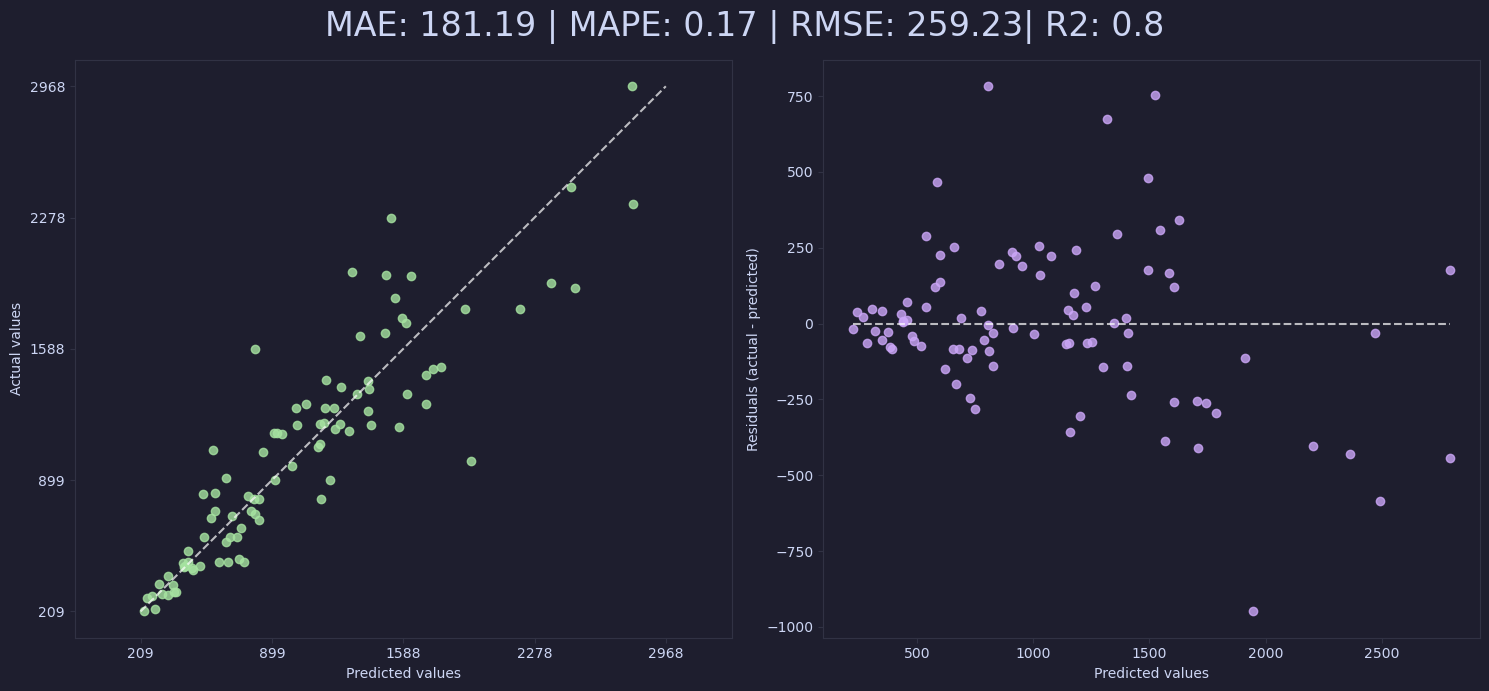

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, PredictionErrorDisplay

y_pred = rf_clf.predict(X_val)
r2 = np.round(r2_score(y_true=y_val, y_pred=y_pred), 2)
mae = np.round(mean_absolute_error(y_true=y_val, y_pred=y_pred), 2)
mape = np.round(mean_absolute_percentage_error(y_true=y_val, y_pred=y_pred), 2)
rmse = np.round(np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_pred)),2)
graph_title = f'MAE: {mae} | MAPE: {mape} | RMSE: {rmse}| R2: {r2}'

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), tight_layout=True)

PredictionErrorDisplay.from_predictions(y_true=y_val, y_pred=y_pred, kind='actual_vs_predicted', ax=axs[0], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#A6E3A1'})
PredictionErrorDisplay.from_predictions(y_true=y_val, y_pred=y_pred, kind='residual_vs_predicted', ax=axs[1], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#CBA6F7'})
plt.suptitle(t=graph_title, size=24)

In [31]:
from xgboost import XGBRegressor, XGBRFRegressor

xgb_clf = TransformedTargetRegressor(
    regressor=Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('rf', XGBRegressor(n_jobs=-1))
        ]
    ),
    transformer=log_transf
)

xgb_clf.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('ohe',
                                                                                       Pipeline(steps=[('imp',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ord',
                                                                                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                       unknown_value=-1))]),
                                                                                       ['Company',
                                                                                        'TypeName',
                                                                                        'OpSys',
                                                                                        'CPU_Manuf',
                                                                                        'CPU_Model',
                                                                                        'GPU_Manuf',
                                                                                        'GPU_Model...
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=100,
                                                                   n_jobs=-1,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...))]),
                           transformer=FunctionTransformer(feature_names_out='one-to-one',
                                                           func=<ufunc 'log1p'>,
                                                           inverse_func=<ufunc 'expm1'>))

Text(0.5, 0.98, 'MAE: 167.75 | MAPE: 0.16 | RMSE: 265.53| R2: 0.79')

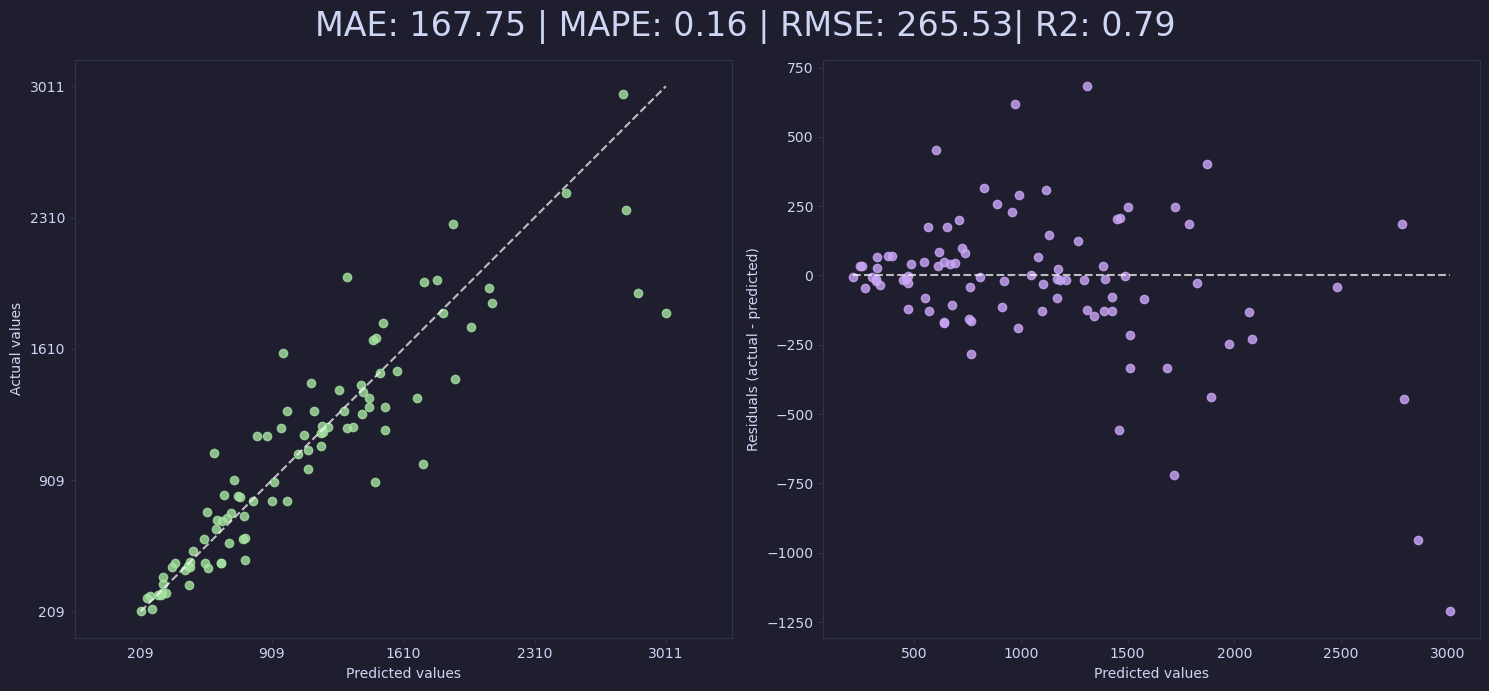

In [32]:
y_pred = xgb_clf.predict(X_val)
r2 = np.round(r2_score(y_true=y_val, y_pred=y_pred), 2)
mae = np.round(mean_absolute_error(y_true=y_val, y_pred=y_pred), 2)
mape = np.round(mean_absolute_percentage_error(y_true=y_val, y_pred=y_pred), 2)
rmse = np.round(np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_pred)),2)
graph_title = f'MAE: {mae} | MAPE: {mape} | RMSE: {rmse}| R2: {r2}'

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), tight_layout=True)

PredictionErrorDisplay.from_predictions(y_true=y_val, y_pred=y_pred, kind='actual_vs_predicted', ax=axs[0], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#A6E3A1'})
PredictionErrorDisplay.from_predictions(y_true=y_val, y_pred=y_pred, kind='residual_vs_predicted', ax=axs[1], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#CBA6F7'})
plt.suptitle(t=graph_title, size=24)

In [ ]:
# test['Price_euros'] = xgb_clf.predict(test_model)
# test.head()

In [ ]:
# submission = test[['id', 'Price_euros']]
# submission.to_csv('submit.csv', index=False)

In [33]:
X_train_preprocessed = pd.DataFrame(
    data=preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()
)

X_val_preprocessed = pd.DataFrame(
    data=preprocessor.fit_transform(X_val),
    columns=preprocessor.get_feature_names_out()
)

print(X_train.shape)
print(X_train_preprocessed.shape)
print(X_val.shape)
print(X_val_preprocessed.shape)

(820, 15)
(820, 15)
(92, 15)
(92, 15)


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

model = nn.Sequential(
  nn.Linear(15, 8),
  nn.ReLU(),
  nn.Linear(8,1)
)

model

Sequential(
  (0): Linear(in_features=15, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [59]:
if not torch.backends.mps.is_available():
  if not torch.backends.mps.is_built():
    print('MPS not available due to Pytorch')
  else:
    print('MPS not available due to MacOs')
else:
  print('MPS Available!')
  mps_device = torch.device('mps')

MPS Available!


In [60]:
X_train_nn = torch.tensor(X_train_preprocessed.to_numpy(), dtype=torch.float32, device=mps_device)
X_val_nn = torch.tensor(X_val_preprocessed.to_numpy(), dtype=torch.float32, device=mps_device)

y_train_nn = torch.tensor(y_train.to_numpy(), dtype=torch.float32, device=mps_device).reshape(-1,1)
y_val_nn = torch.tensor(y_val.to_numpy(), dtype=torch.float32, device=mps_device).reshape(-1,1)

In [79]:
import copy

loss_fn = nn.L1Loss()
optimiser = optim.SGD(model.parameters(), lr=1e-1)

n_epochs = 800
batch_size=820
batch_start = torch.arange(0, len(X_train_preprocessed), batch_size)

best_error = np.inf
best_weights = None
history = []

model.to(device=mps_device)
for epoch in tqdm.tqdm(range(n_epochs)):
  model.train()
  with tqdm.tqdm(batch_start, unit='batch', mininterval=0, disable=True) as bar:
    bar.set_description(f'Epoch {epoch}')
    for start in bar:
      X_batch = X_train_nn[start:start+batch_size]
      y_batch = y_train_nn[start:start+batch_size]
      y_pred = model(X_batch)
      loss = loss_fn(y_pred, y_batch)
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
      bar.set_postfix(mse=float(loss))
  model.eval()
  y_pred = model(X_val_nn)
  error = loss_fn(y_pred, y_val_nn)
  error = float(error)
  history.append(error)
  if error < best_error:
    best_error = error
    best_weights = copy.deepcopy(model.state_dict())



100%|██████████| 800/800 [00:03<00:00, 256.03it/s]


In [80]:
model.load_state_dict(best_weights)
print('MSE = %.4f' % best_error)
print('RMSE = %.4f' % np.sqrt(best_error))

MSE = 472.1040
RMSE = 21.7280


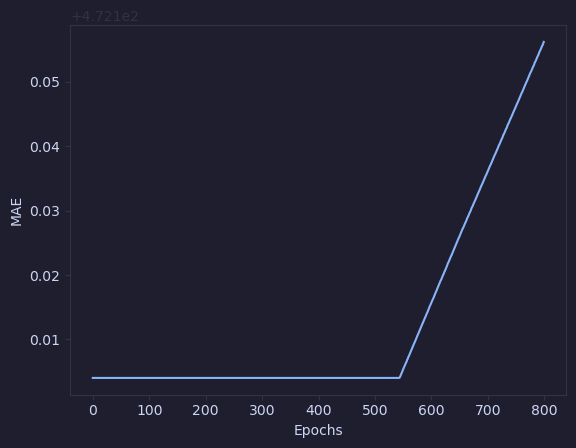

In [81]:
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [84]:
model.eval()
with torch.no_grad():
  y_val_preds = []
  for i in range(len(y_val_nn)):
    y_pred = model(X_val_nn[i:i+1])
    y_pred = y_pred[0].cpu().numpy()
    y_val_preds.append(y_pred)

In [85]:
y_val_preds

[array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=float32),
 array([1054.7966], dtype=fl

In [68]:
X_val['preds'] = y_val_preds_clean
X_val = pd.concat([X_val, y_val], axis=1)
X_val.head()

,Company,TypeName,Inches,OpSys,ResolutionWidth,ResolutionHeight,CPU_Manuf,CPU_Model,GHz,RAM_GB,HDD,Weight_kg,GPU_Manuf,GPU_Model,GPU_Memory,preds,Price_euros
656,HP,Notebook,13.3,Windows 10,1920.0,1080.0,Intel,Core,2.4,4.0,128.0,1.49,Intel,HD Graphics,620.0,1054.828857,719.0
178,MSI,Gaming,17.3,Windows 10,1920.0,1080.0,Intel,Core,2.8,16.0,1256.0,2.70,Nvidia,GeForce GTX,1050.0,1054.828857,1492.8
649,HP,Notebook,15.6,Windows 10,1920.0,1080.0,Intel,Core,1.8,16.0,512.0,2.10,Intel,UHD Graphics,620.0,1054.828857,1159.0
443,Acer,Notebook,15.6,Windows 10,1920.0,1080.0,AMD,A8,2.2,8.0,256.0,2.23,AMD,Radeon R5,5.0,1054.828857,469.0
161,HP,Ultrabook,13.3,Windows 10,1920.0,1080.0,Intel,Core,2.5,8.0,512.0,1.16,Intel,HD Graphics,520.0,1054.828857,1969.0


Text(0.5, 0.98, 'MAE: 472.1 | MAPE: 0.71 | RMSE: 578.72| R2: -0.0')

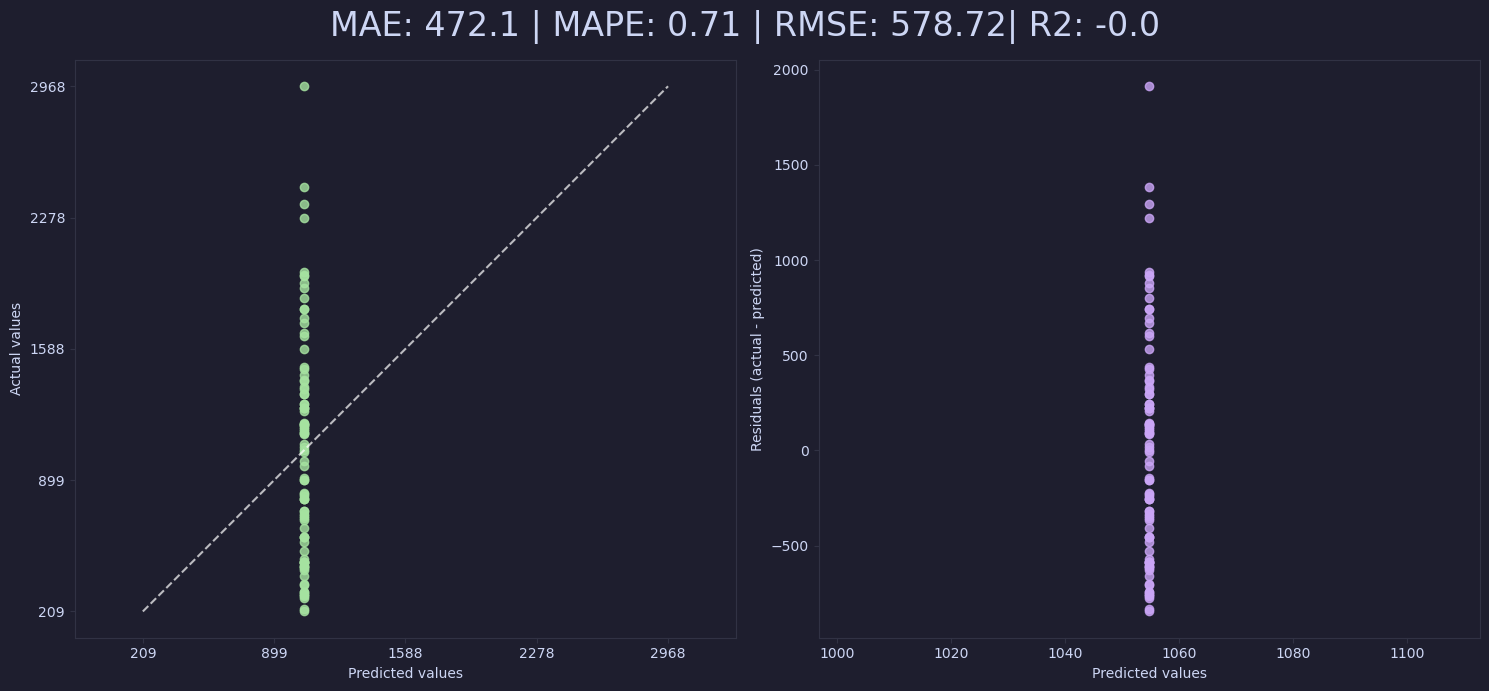

In [70]:
r2 = np.round(r2_score(y_true=X_val['Price_euros'], y_pred=X_val['preds']), 2)
mae = np.round(mean_absolute_error(y_true=X_val['Price_euros'], y_pred=X_val['preds']), 2)
mape = np.round(mean_absolute_percentage_error(y_true=X_val['Price_euros'], y_pred=X_val['preds']), 2)
rmse = np.round(np.sqrt(mean_squared_error(y_true=X_val['Price_euros'], y_pred=X_val['preds'])),2)
graph_title = f'MAE: {mae} | MAPE: {mape} | RMSE: {rmse}| R2: {r2}'

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7), tight_layout=True)

PredictionErrorDisplay.from_predictions(y_true=X_val['Price_euros'], y_pred=X_val['preds'], kind='actual_vs_predicted', ax=axs[0], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#A6E3A1'})
PredictionErrorDisplay.from_predictions(y_true=X_val['Price_euros'], y_pred=X_val['preds'], kind='residual_vs_predicted', ax=axs[1], line_kwargs={'color':'w'}, scatter_kwargs={'color':'#CBA6F7'})
plt.suptitle(t=graph_title, size=24)